In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
TE = np.array([0.05, 0.075, 0.1, 0.1250, 0.1500, 0.1750, 1., 4., 6., 8., 10., 20., 40., 80., 120. ])

A_TE = np.array([29.8052, 30.6430, 30.4590, 30.5603, 30.5333, 29.9927, 29.7743, 27.7212, 26.3389, 25.0423, 23.5243, 18.2328, 10.7676, 3.9379, 1.0925])

In [3]:
def fit_func(TE, A_0, T2):
    return A_0 * np.exp(-TE/T2)

In [4]:
fit_params = curve_fit(fit_func, TE, A_TE)
popt = fit_params[0]
print(popt)

[30.50258506 38.8380911 ]


In [5]:
x_line = np.arange(min(TE), max(TE) + 1, 1)
y_line = fit_func(x_line, *popt)

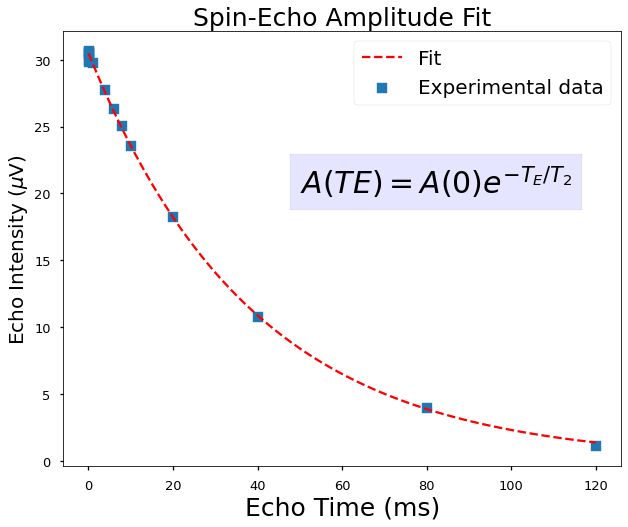

In [8]:
plt.style.use('seaborn-talk')

fig, ax = plt.subplots(1, 1, figsize=(10,8))


ax.scatter(TE, A_TE, marker='s', label = "Experimental data")
ax.plot(x_line, y_line, '--', color='r', label="Fit")
ax.legend(loc="best", fontsize=20)
ax.set_ylabel("Echo Intensity ($\mu$V)", fontsize=20)
ax.set_xlabel("Echo Time (ms)", fontsize=25)
ax.set_title("Spin-Echo Amplitude Fit", fontsize=25)

ax.text(50, 20, '$A(TE) = A(0)e^{- T_{E}/T_{2}}$', style='italic', fontsize=30,
        bbox={'facecolor': 'blue', 'alpha': 0.1, 'pad': 10})
fig.savefig("plots/Echo_Fit_test")